In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, classification_report
from keras.models import Sequential, Model 
from keras.layers import Dense, Input, concatenate, Activation, Dropout
from keras.optimizers import Adam
from tensorflow import set_random_seed
from keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from micromlgen import port

Using TensorFlow backend.
C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\luigi.borriello2\.conda

C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\luigi.borriello2\.conda\envs

In [2]:
def printConfusionMatrix(cm, labels, title=""):

    df_cm = pd.DataFrame(cm, labels, labels)
    # plt.figure(figsize=(10,7))
    sn.set(rc={'figure.figsize':(10,7)})
    sn.set(font_scale=1.4) # for label size
    ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
    ax.set_title(title)
    ax.set(xlabel='Predicted Labels', ylabel='Real Labels')


    pyplot.show()

In [3]:
RANDOM_SEED = 42

In [4]:
np.random.seed(RANDOM_SEED)
set_random_seed(RANDOM_SEED)

In [5]:
with open('data/XS6.pkl', 'rb') as f:
    X = pickle.load(f)

with open('data/yS6.pkl', 'rb') as f:
    y = pickle.load(f)

In [6]:
classes = np.unique(y).tolist()
for i in range(len(classes)):
    y = np.where(y==classes[i], i, y) 

Split in train and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED)

C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review 

In [8]:
#y_train = pd.get_dummies(y_train).values
#y_test = pd.get_dummies(y_test).values

In [9]:
y_train

array([ 7,  5,  9,  9,  5,  4,  1,  9,  1,  2,  9,  4,  1,  8, 10,  0, 10,
        9,  8,  8,  6,  0,  3,  5,  6,  1,  2,  7,  2,  1, 10,  6,  0, 10,
        2,  8,  4,  0,  2,  2,  1,  0,  2,  0,  0,  0,  5,  6,  8,  1,  8,
        0,  2,  8,  9,  4,  2, 10,  7,  9,  9, 10,  5,  3,  9,  1,  5,  9,
        8,  4,  3,  9,  5,  7,  4,  3,  8,  2,  5,  2,  3,  8,  5,  6,  7,
        7,  6,  2,  7,  3,  7,  3,  8,  1,  0,  0,  6,  1,  5,  6,  6,  7,
        6,  2,  9,  7,  5,  3,  8,  3,  4,  9,  1,  9,  4,  4,  9,  4,  5,
        3,  3,  7,  0, 10,  4,  0,  6,  4,  6,  5,  9,  4,  2,  7,  9,  3,
        8,  6,  2,  1, 10,  5,  3,  5,  6, 10,  9,  3,  0,  2,  8,  4,  5,
        3,  9,  3,  5, 10,  1,  9,  4, 10,  1,  2, 10,  5,  9,  6,  4,  5,
        4,  7,  2, 10,  0,  3,  6,  5,  5,  1, 10,  9,  8, 10,  1,  1,  5,
        9,  6,  7,  1,  1,  7,  1,  4, 10,  6,  4,  0,  1,  2,  8, 10,  6,
        7,  3,  7,  5,  0,  2,  6,  8,  1,  0,  6,  8,  6, 10,  3,  3,  1,
        4,  7,  7,  7,  8

In [10]:
X_train.shape[1]

32

## Models Evaluation

### RF

In [11]:
model = RandomForestClassifier(n_estimators=500, random_state=42)
#model = MLPClassifier(random_state=42)

In [12]:
model.fit(X_train, y_train)

C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision.

C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to rev

C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to rev

C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to rev

C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to rev

C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to rev

C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to rev

C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to rev

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [13]:
y_pred = model.predict(X_test)

C:\Users\luigi.borriello2\.conda\envs\ts\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [14]:
f1_score(y_test, y_pred, average="weighted")

0.6656505880581847

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       1.00      0.95      0.97        20
           2       0.46      0.30      0.36        20
           3       1.00      0.90      0.95        20
           4       0.50      0.30      0.37        20
           5       0.53      0.50      0.51        20
           6       0.95      0.95      0.95        20
           7       0.54      0.70      0.61        20
           8       0.59      0.65      0.62        20
           9       0.48      0.50      0.49        20
          10       0.48      0.65      0.55        20

    accuracy                           0.67       220
   macro avg       0.67      0.67      0.67       220
weighted avg       0.67      0.67      0.67       220



In [16]:
print(confusion_matrix(y_test, y_pred))

[[20  0  0  0  0  0  0  0  0  0  0]
 [ 1 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  4  2  0  6  2  0  0]
 [ 2  0  0 18  0  0  0  0  0  0  0]
 [ 0  0  4  0  6  6  0  4  0  0  0]
 [ 0  0  1  0  2 10  0  2  3  2  0]
 [ 0  0  0  0  0  0 19  0  0  1  0]
 [ 0  0  2  0  0  1  0 14  1  2  0]
 [ 0  0  0  0  0  0  0  0 13  1  6]
 [ 0  0  0  0  0  0  1  0  1 10  8]
 [ 0  0  0  0  0  0  0  0  2  5 13]]


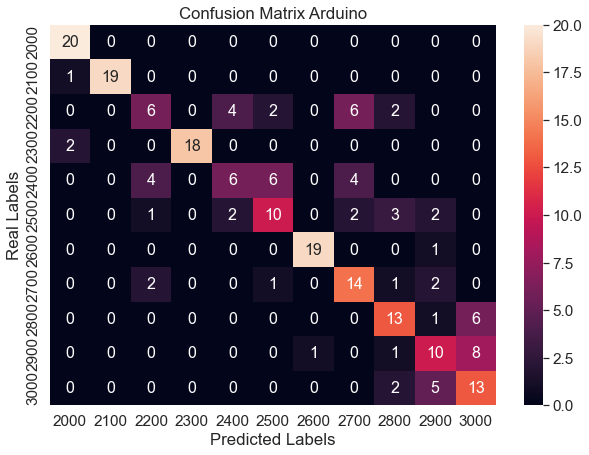

In [17]:
labels = [2000 + 100* i for i in range(0,11)]

cm_arduino = confusion_matrix(y_test, y_pred)

printConfusionMatrix(cm_arduino, labels, "Confusion Matrix Arduino")


In [18]:
with open('rf_model_s6.h', 'w') as f:  # change path if needed
    f.write(port(model, optimize=False))

In [19]:
with open('models/rf_model_s6.pkl', 'wb') as f:
    pickle.dump(model, f)
